In [33]:
#! pip install pymorphy2
#! pip install -U pip setuptools wheel
#! pip install -U spacy 
#! python -m spacy download en_core_web_sm
#! python -m spacy download ru_core_news_sm
#! pip install --user -U nltk
#! pip install -U liblinear-official

In [1]:
#! pip install natasha
#! pip install ipymarkup


In [38]:
from yargy.tokenizer import MorphTokenizer
from yargy import rule, or_, Parser
from yargy.predicates import eq, type as _t, normalized, gram
from ipymarkup import show_span_box_markup, show_span_line_markup
from yargy.pipelines import morph_pipeline as mp
from yargy.interpretation import fact
from IPython.display import display

In [3]:
TOKENIZER = MorphTokenizer()

In [243]:
text = '''
Ответственность за исполнение распоряжения возложить на специалиста первой категории 
административно-хозяйственного отдела Кравцову И.Е.
'''

In [244]:
list(TOKENIZER(text_1))

In [112]:
#Grams(NOUN,gent,inan,neut,sing)),
#Grams(NOUN,inan,neut,nomn,plur)),
#Grams(NOUN,accs,inan,neut,plur))
# Определить сущности, определить словосочетания, добавить всё в mp, спарсить слова из Русблока.
# Grams
# Зафиксировать список


ADVB = gram('ADVB')
ADJF = gram('ADJF')
INFN = gram('INFN')
ADJF = gram('ADJF')
NOUN = gram('NOUN')
Surn = gram('Surn')
Name = gram('Name')
Patr = gram('Patr')
ABR = gram('Abbr')
#NOUN = ['административно-хозяйственного',]
NAMES = ['Кравцову И.Е.']
#SGTM = type('NOUN')

In [216]:
DEPARTMENTS = mp(['Отдел проектирования',
 'Бухгалтерия',
 'Отдел эксплуатации',
 'Отдел тестирования',
 'Отдел разработки систем',
 'Служба ИТ',
 'Отдел архитектуры',
 'Административно-хозяйственный отдел'])
POSITION = ['системный администратор']

RESPONSIBLE = rule(DEPARTMENTS, NOUN)
ABR_NAMES = rule(Surn, ABR.repeatable().optional(), eq("."), ABR.optional().repeatable(), eq("."))
#ONE_TWO_DEP = rule(NOUN_, eq('-'), NOUN_)
#NAMES = mp['']
#FUNC = mp['']
NAMES_FULL = rule(or_(Surn,
Name,
Patr))
parser = Parser(or_(NAMES_FULL, DEPARTMENTS))
parse_departments = Parser(DEPARTMENTS)
matches = list(parser.findall(text_1))
matches_2 = list(parser.findall(text_1))
spans = [_.span for _ in matches]
spans_2 = [_.span for _ in matches_2]
show_span_box_markup(text_1, spans)

In [215]:
text_1 = """ООО "Мегасофт"
Приказ
Для организации мероприятия "День заказчика" приказываю:
1. Провести анализ поставщиков для замены вышедшего из строя оборудования. Срок завершения: 24 октября 12.
Ответственность за исполнение распоряжения возложить на специалиста третьей категории Службы ИТ Кима Юрия Ивановича
2. Выполнить ремонт кабеля сети передачи данных между этажами здания. Дата окончания: 12 авг 13.
Контроль над выполнением приказа возложить на системного администратора Сергеева Андрея
3. Создать и настроить виртуальную машину в соответствии с техническим заданием. Установить срок выполнения задачи до 10 сен 19.
Контроль над исполнением распоряжения оставить за специалистом третьей категории Службы ИТ Кимом Юрием Ивановичем"""

### Структированное представление

In [217]:
from IPython.display import display
from yargy.parser import prepare_trees
from yargy.predicates import (
    lte,
    gte,
    dictionary
)

departments = {'Отдел проектирования',
 'Бухгалтерия',
 'Отдел эксплуатации',
 'Отдел тестирования',
 'Отдел разработки систем',
 'Служба ИТ',
 'Отдел архитектуры',
 'Административно-хозяйственный отдел'}
Departments = dictionary(departments)

COMPANY = "ООО 'МегаСофт'"
Num_departments = and_(
    gte(0),
    lte(8)
).named(COMPANY)
#parser = Parser(Num_departments)
#match = parser.match("административно-хозяйственного отдела")
#match.tree.as_dot

#text = '''
#Ответственность за исполнение распоряжения возложить на специалиста 
#первой категории административно-хозяйственного отдела Кравцову И.Е.
#'''
#for line in text.splitlines():
#    match = parser.match(line)
#    display(match.tree.as_dot)
#for match in parser.findall(text):
#    match = parser.match(line)
#    print([_.value for _ in match.tokens])
#    display(match.tokens.tree.as_dot)
#for match in parser.findall(text):
#    print([_.value for _ in match.tokens])

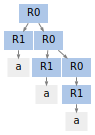

In [219]:
# Черновик построения графа на основе входящих данных
A = or_(
    rule('a'),
    rule('a', 'a')    
)
B = A.repeatable()

parser = Parser(B)
match = parser.match('a a a')
match.tree.as_dot



### Определение опечаток


In [228]:
from nltk import edit_distance


def filter_text(text):
    text = text.lower()
    # text = text.lower().strip()
    # Убирать разные символы
    text = text.strip()
    # Найти все знаки преминания и заменить их на пустоту
    #expression = r'[^\w\s]'
    #text = re.sub(expression, "", text)
    # lambda t: re.sub(r'[^\w\s]', t.lower(), t.strip(),t) уточнить
    return text


def text_match(text, example):
    text = filter_text(text)
    example = filter_text(example)

    distance = edit_distance(text, example)
    avg_len = (len(text) + len(example)) / 2
    # Процент опечаток
    ratio = distance / avg_len
    if distance > 3:
        return False

    elif ratio > 0.2:
        return False

    else:
        return True



    
filter_text(text_3), text_match(text_3, text_4)

('одминистративно-хозддддяйственный отдел', False)

In [241]:
text_3 = "Одминистративно-хозддддяйственный отдел"
text_4 = "Админитративннок-хозяйственный отдел"
departments = ['Отдел проектирования',
 'Бухгалтерия',
 'Отдел эксплуатации',
 'Отдел тестирования',
 'Отдел разработки систем',
 'Служба ИТ',
 'Отдел архитектуры',
 'Административно-хозяйственный отдел']
text_5 = departments[7]

print("Большая опечатка: ", text_match(text_3, text_5)), print("Небольшая опечатка: ", text_match(text_4, text_5))

Большая опечатка:  False
Небольшая опечатка:  True


(None, None)

### Создаём правила